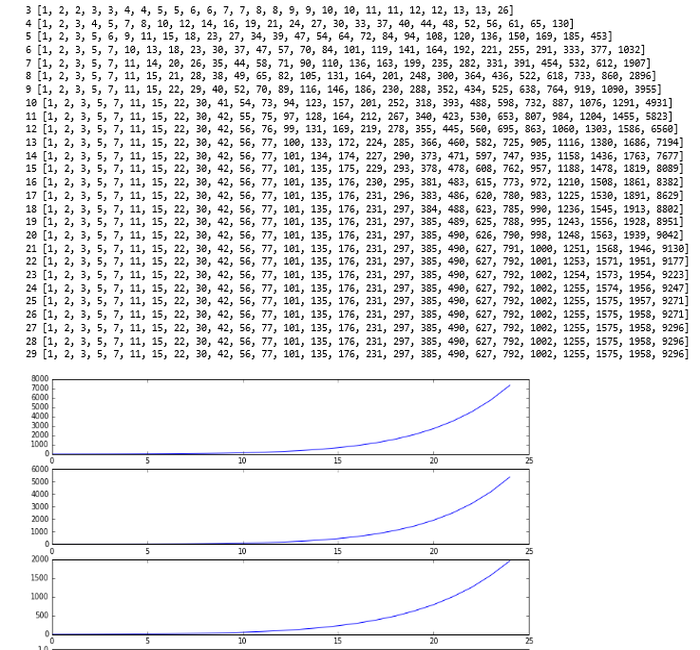

In [4]:
import kilroy
kilroy.Show('ring','reverse_growth.png',700,650)

*numbers: vertical is ring size, horizontal is distance (in 'reverse flips') from the final position: 1 0 0 0 ... 0. 
The values are then the number of available states of the ring at that distance. Interestingly they increment 
vertically in the same way that stabilized configurations read horizontally (1, 2, 3, 5, 7, ...). 
The value in the last column is incorrect due to a code bug.*


## The positive ring problem

This problem is easy to state but I do not have a satisfactory solution yet. I have an idea about a solution
based on the experiments given below... but nothing like 'yep that's it' yet. The problem is related in spirit
to a famous problem called the [**Collatz conjecture**](https://en.wikipedia.org/wiki/Collatz_conjecture).


##### Here we go

Consider a set of numbers (let's say integers) whose sum is positive. 
Arrange these in a ring so they have a definite order but no start and no end point. 
Suppose at least one of the ring numbers is negative.
Select one such negative value and flip its sign, say $-x$ becomes $+x$. This has added
$2x$ to the total so we now remove this as follows: Subtract $x$ from the numbers to the left and right
of what is now $x$. The overall sum is now unchanged from its initial value. 
Show that repeatedly following these steps eventually produces a ring with no negative values.


As an example the number $-4$ in the three number sequence $5, \; -4, \; 3$ could be *flipped* in this 
manner resulting in a new sequence $1,\; 4,\; -1$. The sum remains $4$. Now the $-1$ is a candidate
to be flipped on a subsequent pass.


The solution must be independent of the number of numbers in the ring, their sum, their
distribution, and the manner in which negatives are chosen for flipping. 


Rodney states that this problem was posed in a competition -- perhaps the Putnam exam?


I use computer programs to explore this problem.


#### Program notes


The first program below selects negative values to flip at random from an initial
ring of $n$ with sum = 1. This is the smallest possible positive sum so it is chosen to
keep the problem difficult. The range of numbers is [-xtreme, xtreme].


The second program uses recursion to flip negative values in the ring in every
conceivable order. 


The third program goes in reverse, recursively: It begins with the stable configuration
$1, \; 0, \; 0, \; 0, \dots \; 0$ and calculates every possible prior configuration.


#### Metrics

The first attempt I made defined a metric $M$ calculated from the $n$ numbers after each flip. 
Finding such an $M$ that is monotonic and bounded would comprise a proof. For example if
$M$ started at 19, was always an integer and was obliged to get smaller with every flip and if
$M$ could not be less than $0$: That would be a convincing argument that the ring must
eventually have no negatives. In practice such an $M$ proved to be difficult to invent. 
Many tries produced $M$ metrics that were trend-wise monotonic but with some 'noise':
Some wiggling up and down. Some metrics even increased before turning back downward
to zero. 

Two things emerged from the metric idea: The metric is hard to come up with... and just based
on observation the conjecture that all of the negative values eventually vanish is true.



#### A mistake in the implementation

I tried an alternative method of flipping: 

```
choose random vertex on the ring at location a with value < 0
at a: Add two
at (a+1): Subtract 1
at (a-1): Subtract 1
```

This preserves the sum but it is not the same algorithm as the one stated in the problem.
This does suggest that other versions of the flip rule are possible; and even that the 
problem as stated is a special case of a more generalized flip. This in turn suggests 
that solving a more generalized case would solve the stated problem.


#### Notes on how the code runs

The code calculates a p[] list with sum $s=1$. 'p' is for 'polygon', the ring of numbers
we consider. 


My initial exploration of metrics included individual p[] values, local gradients (RK
makes the point that $F$ is a discrete version of Del-Squared) and distances. The distance
idea asks 'how far around the polygon must I traverse from a negative vertex to find a
compensatory positive balance?' There are a number of ways to do this and only a few were
tried. I wrote the function 'entropy()' to record attempts at metrics.

An interesting thing happens (resembling a CA) when only one negative value remains.
Suppose for example the sequence is 0 0 0 0 0 0 0 0 0 0 0 0 1 7 -7 0 0 0 0 0 0 0 0 0 0.
Now there is only one vertex to flip and this will create a traveling wave that
continues to the right until it approaches the 1 from the left, whereupon it is
modifed to ...1 6 -6... and so on until only the 1 remains: ...1 0 0...

What is interesting about this is that the individual numerical values across p[] do not
change; only the spatial distribution of values changes. There is a barrier on one side
of the negative so the negative value slides or surfs on a wave in the opposite direction. 


In [ ]:
import random as r
import numpy as np
import matplotlib.pyplot as plt

xtreme = 4
n = 14
p = []
q = []
for i in range(n):
    p.append(0)
    q.append(0)

def kJustify(i):
    while i < 0: i += n
    while i >= n: i -= n
    return i
    
# main_metric() calculates some number from the composition of values in the ring
def main_metric():
    # go left, go right; add up "something"...
    # product = 1
    distList = []
    for i in range(n):
        distLeft = 0
        distRight = 0
        if p[i] < 0:

            # go left
            sumLeft = p[i]
            for j in range(n-1):
                distLeft = j + 1
                k = i - distLeft
                thisP = p[kJustify(k)]
                sumLeft += thisP
                # until running sum is negative
                if sumLeft >= 0: break

            # go right
            sumRight = p[i]
            for j in range(n-1):
                distRight = j + 1
                k = i + distRight
                thisP = p[kJustify(k)]
                sumRight += thisP
                # until running sum is positive
                if sumRight >= 0: break

            # sumMinDistances += min(distLeft, distRight)
            intermedResult = distLeft + distRight
            distList.append(intermedResult)
    if len(distList) == 0: return 0
    return np.mean(distList)

def metric1():
    q[:] = p[:]
    return q[1]

def min(a, b):
    if a < b: return a
    return b

def distance(a, b):
    d1 = abs(a - b)
    d2 = abs((a + n) - b)
    d3 = abs((a - n) - b)
    return min(d1, min(d2, d3))

def kDec(k):
    if k == 0: return n-1
    return k - 1

def kInc(k):
    if k == n - 1: return 0
    return k + 1


sum = -1
while sum != 1:
    for i in range(n):
        p[i]=r.randint(-xtreme,xtreme)
    sum = 0
    for i in range(n): sum += p[i]

print(p)

fig, ax = plt.subplots(3, figsize=(12,10))
ax[0].axis('equal')
# ax[1].axis('equal')
# ax[1].plot(p)

# Three metric histories
mrec = []
mrec1 = []
mrec2 = []

# p[] is the ring; ps[] is the record of it over time
ps = []

nTrials = 0
while True:
    neglocs = []
    foundNeg = False
    for i in range(n):
        if p[i] < 0:
            neglocs.append(i)
            foundNeg = True

    if foundNeg == False:
        break

    nTrials += 1
    numNegs = len(neglocs)
    thisIndex = r.randint(0, numNegs - 1)
    k = neglocs[thisIndex]

    # print ('trial', nTrials, 'selected index', k)
    # print (p)

    # here are the correct rules of the game
    ak = p[k]
    p[k] = -ak
    kmo = kDec(k)
    kpo = kInc(k)
    p[kmo] += ak
    p[kpo] += ak

    # here are the epsilon rules
##    ak = p[k]
##    p[k] += 2
##    p[kDec(k)] -= 1
##    p[kInc(k)] -= 1

    # if not nTrials%10: ax[1].plot(p)

    metric = 0
    for i in range(n-1):
        # n = 6: 0 1 2 3 4
        if True:
            for j in range(n - 1 - i):
                # 0 1 2 3 4
                # 0 1 2 3
                # 0 1 2
                # 0 1
                # 0
                i1 = i
                i2 = i + 1 + j
                # 1 2 3 4 5
                # 2 3 4 5
                # 3 4 5
                # 4 5
                # 5
                if True:
                    delta = p[i1]-p[i2]
                    deltaAbs = abs(delta)
                    deltaSqd = delta * delta
                    dist = distance(i1, i2)
                    distSqd = dist * dist
                    # metric += delta * dist
                    metric += deltaAbs * distSqd

    # metric = np.std(p)
    this_metric = main_metric()
    
    second_metric = 0
    for i in range(n):
        # if p[i] >= 0: metric += p[i]**2
        if p[i] < 0: second_metric += p[i]**2

    # print p, '  ', this_metric
    mrec.append(this_metric)
    mrec1.append(second_metric)
    mrec2.append(metric)
    ps.append(p)

ax[0].plot(range(nTrials), mrec)
ax[1].plot(range(nTrials), mrec1)
ax[2].plot(range(nTrials), mrec2)

# ax.plot(mrec1)
plt.show()
# plt.plot(ps[0])
# plt.plot(ps[1])
# plt.plot(mrec)
# plt.show()

# This is wrong: ax[0].ylim([0., 20.])

print nTrials

In [ ]:
# Second program
# a recursive view to explore all choices at once

import random as r
import numpy as np
import matplotlib.pyplot as plt

xtreme = 1
n = 16
maxDepth = -1
canonicalMaxDepth = -1
p = []     # the ring
pHistory = []
pDepth = []
quiescent = []
m0 = []  # first index is depth; 2nd index is path; value is metric at that point
m1 = []
m2 = []
m3 = []
ms = []
histogram = []
nConfigs = 0
nNovelConfigs = 0
nWaveOffs = 0
qDepthMismatches = 0
nHistoryDepthMismatches = 0

for i in range(n):
    p.append(0)
    histogram.append(0)

def kJustify(i):
    while i < 0: i += n
    while i >= n: i -= n
    return i

# metricN() calculates a value from the ring p[]
def metric0(p): return 1.0

def metric1(p): return 0.0

def metric2(p): return 0.0

def metric3(p): return 0.0

# copy p to q as separate data use q[:] = p[:]

def min(a, b):
    if a < b: return a
    return b

def distance(a, b):
    d1 = abs(a - b)
    d2 = abs((a + n) - b)
    d3 = abs((a - n) - b)
    return min(d1, min(d2, d3))

# ring-decrement an index k
def kDec(k):
    if k == 0: return n-1
    return k - 1

# ring-increment an index k
def kInc(k):
    if k == n - 1: return 0
    return k + 1

# configure p[]
def config_p():
    sum = -1
    while sum != 1:
        for i in range(n):
            p[i] = r.randint(-xtreme,xtreme)
        sum = 0
        for i in range(n): sum += p[i]

def count_negatives(ring):
    neglocs = []
    nNeg = 0
    for i in range(n):
        if ring[i] < 0:
            neglocs.append(i)
            nNeg += 1
    return nNeg, neglocs

# iterative function to try the next negation
# passed both a depth and a ring p[] (which must be a copy of p[] (kilroy ?))
# start by assuming we are just arrived at a new state (even Zeroth)
# calculate the 4 metrics and the metric sum for this depth
# get the list of negative locations and...
#   if we are done: return
#   loop over each location: Copy p[] to q[], flip q[] per the list, call flip()
def flip(depth, p):
    
    global maxDepth
    global nConfigs
    global nNovelConfigs
    global nWaveOffs
    global canonicalMaxDepth
    global qDepthMismatches
    global nHistoryDepthMismatches
    
    nConfigs += 1
    
    # print(p, depth)
    
    if depth > maxDepth: 
        maxDepth = depth
        m0.append([])
        m1.append([])
        m2.append([])
        m3.append([])
        ms.append([])
    if p not in pHistory:
        nNovelConfigs += 1
        pHistory.append(p)
        pDepth.append(depth)
        m0[depth].append(metric0(p))
        m1[depth].append(metric1(p))
        m2[depth].append(metric2(p))
        m3[depth].append(metric3(p))
        ms[depth].append(m0[depth][-1]+m1[depth][-1]+m2[depth][-1]+m3[depth][-1])
    nNeg, nlocs = count_negatives(p)
    if nNeg == 0:
        quiescent.append(p)
        if canonicalMaxDepth == -1: canonicalMaxDepth = depth
        elif depth != canonicalMaxDepth: qDepthMismatches += 1               
    for j in range(nNeg):        
        q=p[:]
        flipperwalt = -q[nlocs[j]]
        q[nlocs[j]] = flipperwalt
        q[kJustify(nlocs[j]-1)] -= flipperwalt
        q[kJustify(nlocs[j]+1)] -= flipperwalt
        if q in pHistory:
            nWaveOffs += 1
            hIndex = pHistory.index(q)
            # Notice that q is a next-gen so its depth is actually depth+1 from here
            if depth+1 != pDepth[hIndex]: 
                nHistoryDepthMismatches += 1
                print 'history depth mismatch:', depth, hIndex, pDepth[hIndex], pHistory[hIndex], q
        else: flip(depth+1, q)
    return
        
# top of main ;)
config_p()
print p
fig, ax = plt.subplots(5, figsize=(12,10))
flip(0, p)

# compress the metric results into single values per depth
nFlips = len(m0)
gm0 = []
gm1 = []
gm2 = []
gm3 = []
gms = []
for i in range(nFlips):
    gm0.append(np.sum(m0[i]))
    gm1.append(np.mean(m1[i]))
    gm2.append(np.mean(m2[i]))
    gm3.append(np.mean(m3[i]))
    gms.append(np.mean(ms[i]))
    
# plot the results
ax[0].plot(range(nFlips), gm0)
# ax[1].plot(range(nFlips), gm1)
# ax[2].plot(range(nFlips), gm2)
# ax[3].plot(range(nFlips), gm3)
# ax[4].plot(range(nFlips), gms)

print 'qui[0] = ', quiescent[0], 'and there are n quiescent arrivals, n = ', len(quiescent)
for i in range(1, len(quiescent)):
    if quiescent[i] != quiescent[0]: print 'qui', i, 'is ', quiescent[i], 'and this varies from qui[0]'
print nConfigs, 'configs, novel:', nNovelConfigs, 'wave-offs: ', nWaveOffs, 'maxDepth:', maxDepth, 'nFlips - 1:', nFlips - 1
print 'quiescent depth mismatches = ', qDepthMismatches, 'p history depth mismatches = ', nHistoryDepthMismatches

plt.show()

#### Remarks on the second program

The program supports a conjecture (but does not prove it!): Order or choice of negatives to flip is 
immaterial. The exhaustive configuration tree expands initially to some maximum number... and this in turn 
collapses into a smaller and smaller set of configurations, finally to arrive *always in the same number
of steps* to a single quiescent state. 

If the ring sum is 1 the quiescent state will be all zeros but for a single one. 

The convergence is a bit unexpected because of the apparent breadth of choice, a typical branching
factor search tree. As or more unexpected is that the number of flips to the quiescent state is 
constant from some initial ring. 

Could explore: What is common to the different parents of a given configuration?

Many paths = same path: If a given set of flips leads to Q then consider the histogram of those flips;
and the claim is that any *other* set of flips leading to Q:
- leads to the *same* Q
- requires the same number of steps
- has the precise same histogram of flips just played in a different order

histogram[] is written into the code but not implemented.

Would introducing a flip on a positive cell work? 

/home/nbuser/anaconda2_410/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


([1, 0, 0, 0, 0, 0, 0], 0)
([-1, 1, 0, 0, 0, 0, 1], 1)
([0, -1, 1, 0, 0, 0, 1], 2)
([0, 0, -1, 1, 0, 0, 1], 3)
([0, 0, 0, -1, 1, 0, 1], 4)
([0, 0, 0, 0, -1, 1, 1], 5)
([0, 0, 0, 0, 0, -1, 2], 6)
([2, 0, 0, 0, 0, 1, -2], 7)
([-2, 2, 0, 0, 0, 1, 0], 8)
([0, -2, 2, 0, 0, 1, 0], 9)
([0, 0, -2, 2, 0, 1, 0], 10)
([0, 0, 0, -2, 2, 1, 0], 11)
([0, 0, 0, 0, -2, 3, 0], 12)
([0, 0, 0, 0, 1, -3, 3], 13)
([0, 0, 0, 1, -1, -2, 3], 14)
([3, 0, 0, 0, 1, 0, -3], 14)
([0, 0, 0, -2, 3, -1, 1], 12)
([0, 0, 0, 1, -3, 2, 1], 13)
([0, 0, 1, -1, -2, 2, 1], 14)
([1, 0, 0, 1, -3, 3, -1], 14)
([1, 0, 0, -2, 3, 0, -1], 13)
([-1, 1, 0, -2, 3, 0, 0], 14)
([0, 0, -2, 2, 1, -1, 1], 11)
([0, 0, -2, 3, -1, 0, 1], 12)
([0, 0, 1, -3, 2, 0, 1], 13)
([0, 1, -1, -2, 2, 0, 1], 14)
([1, 0, 1, -3, 2, 1, -1], 14)
([1, 0, -2, 3, -1, 1, -1], 13)
([-1, 1, -2, 3, -1, 1, 0], 14)
([1, 0, -2, 3, 0, -1, 0], 14)
([1, 0, -2, 2, 1, 0, -1], 12)
([-1, 1, -2, 2, 1, 0, 0], 13)
([0, -1, -1, 2, 1, 0, 0], 14)
([0, -2, 2, 0, 1, -1, 1], 10)
([0, -

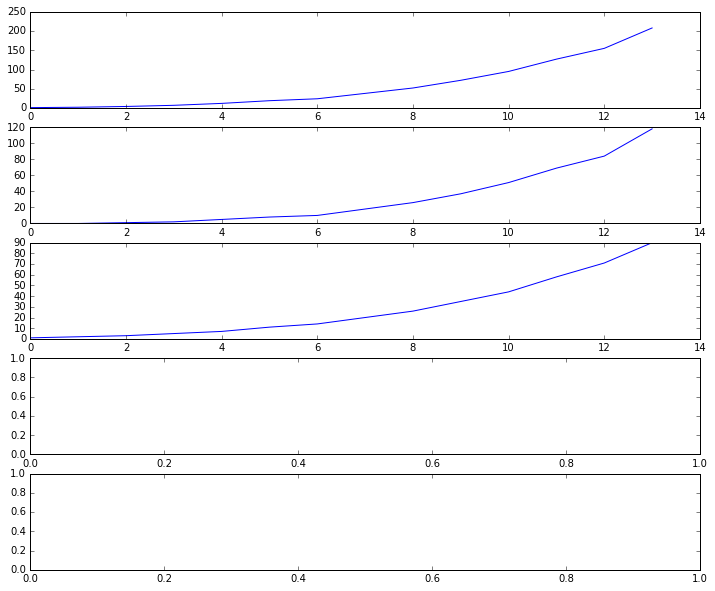

In [1]:
# Third program
# Recursive as Second program; but reverse flips to go backwards from quiescent

import random as r
import numpy as np
import matplotlib.pyplot as plt

xtreme = 1    # max abs value of cell
n = 4
maxReverseDepth = 14
maxDepth = -1
canonicalMaxDepth = -1
p = []     # the ring
pHistory = []
pDepth = []
branches = []
degenerates = []
nConfigs = 0
nDegenerates = 0

def kJustify(i):
    while i < 0: i += n
    while i >= n: i -= n
    return i

# copy p to q as separate data use q[:] = p[:]

def min(a, b):
    if a < b: return a
    return b

def distance(a, b):
    d1 = abs(a - b)
    d2 = abs((a + n) - b)
    d3 = abs((a - n) - b)
    return min(d1, min(d2, d3))

# ring-decrement an index k
def kDec(k):
    if k == 0: return n-1
    return k - 1

# ring-increment an index k
def kInc(k):
    if k == n - 1: return 0
    return k + 1

# configure p[]
def config_p(n):
    global p
    global branches
    global degenerates
    p = []
    branches = []
    degenerates = []
    for i in range(n):
        p.append(0)
    p[0] = 1
    for i in range(maxReverseDepth + 1):
        branches.append(0)
        degenerates.append(0)

def count_positives(ring, n):
    poslocs = []
    nPos = 0
    for i in range(n):
        if ring[i] > 0:
            poslocs.append(i)
            nPos += 1
    return nPos, poslocs

# iterative function to try the next reverse-flip
# Let's number in the opposite direction and we'll use a limit maxReverseDepth to constrain
#   how far we go.
# passed both a depth and a ring p[] (which must be a copy of p[] (kilroy ?))
# start by assuming we are just arrived at a new state (even Zeroth)
# get the list of positive locations and...
#   if we hit nReverses or an already-found configuration: return
#   loop over each location: Copy p[] to q[], reverse_flip q[] per the list, call reverse_flip()
def reverse_flip(depth, p, n):
    
    global maxDepth
    global nConfigs
    global canonicalMaxDepth
    global maxReverseDepth
    global nDegenerates
    
    nConfigs += 1
    print(p, depth) 
    pHistory.append(p)
    pDepth.append(depth)     
    nPos, plocs = count_positives(p, n)
    branches[depth] += nPos
    
    if depth >= maxReverseDepth: return
            
    for j in range(nPos):        
        q=p[:]
        reverse_flipperwalt = q[plocs[j]]     # a positive number
        q[plocs[j]] = -reverse_flipperwalt    # the reverse-flip to the negative
        q[kJustify(plocs[j]-1)] += reverse_flipperwalt
        q[kJustify(plocs[j]+1)] += reverse_flipperwalt
        if q in pHistory:
            nDegenerates += 1
            degenerates[depth] += 1          
            hIndex = pHistory.index(q)    # the index of the prior-found copy of this q in pHistory[], a list of lists

            # Notice that q is a next-gen so its depth is actually depth+1 from here
            # What we do here is determine if this hypothetical q -- which is redundant to a prior-found p -- 
            #   was encountered at a different depth (via the pDepthp[] list)
            #   If this happens then we add one to the appropriate counter; but we do not expect this to happen
            if depth + 1 != pDepth[hIndex]: 
                nHistoryDepthMismatches += 1
                print 'history depth mismatch:', depth, hIndex, pDepth[hIndex], pHistory[hIndex], q
        else: reverse_flip(depth + 1, q, n)
    return
      
all_uniques = []

ncells_start = 7
ncells_end = 8

# top of main ;)
for n in range(ncells_start,ncells_end):
    config_p(n)
    reverse_flip(0, p, n)
    uniques = []
    for i in range(maxReverseDepth + 1):
        uniques.append(branches[i] - degenerates[i])
    all_uniques.append(uniques)
    print n, ncells_end

for n in range(ncells_start, ncells_end):
    print n, all_uniques[n-ncells_start]
    
# print p
fig, ax = plt.subplots(5, figsize=(12,10))
    
# plot the results
ax[0].plot(range(maxReverseDepth), branches[0:maxReverseDepth])
ax[1].plot(range(maxReverseDepth), degenerates[0:maxReverseDepth])
ax[2].plot(range(maxReverseDepth), uniques[0:maxReverseDepth])
# ax[3].plot(range(nFlips), gm3)
# ax[4].plot(range(nFlips), gms)

# print '#', n, branches, degenerates, uniques
# print 'configs:', nConfigs, 'q degenerates: ', nDegenerates

plt.show()

### Idea for the solution

Based on the evidence so far...

Let's take a sub-problem of a set of integers whose sum is $+1$ in a ring. This can be thought of as a 'hard' version
of the positive ring problem because the sum is just *barely* greater than zero. Furthermore take a definite value
of $n=5$ for the number of numbers. Take an initial configuration of -1 -1 1 1 1 for the ring. Now you have two choices as to which numbers to flip. After that you will have only one choice, and so on. At each step you have some number of choices
which gradually leads you to a final state of four zeros plus one 1. If you follow all possible paths to the final state
you generate a directed graph. The graph of the states: Let's call that the
forward graph. 
The contention is that no matter which path you follow you arrive at the final state in
the same number of flips. Further more I conjecture the number of flips accumulated as a histogram in the five positions
is also the same no matter which path or sequence of flips you choose. 


Now begin with that final state and go backwards, choosing all possible positive numbers at each step to reverse-flip.
This produces the reverse graph. That is, the process of going backwards in all possible ways 
will generate a directed graph in the other direction that gradually expands. The configurations on this
graph are not comprehensive. There are some possible configurations that will not appear.
Due to the ring nature of the graph they will only be one fifth of the total number of 
configurations. The other 4/5 are generated from rotating the single 1 in the final position through its 4 other possible 
locations. Taken all together the claim is that these five different initial configurations will generate all possible
'starting points' eventually. In particular the tree generated by 1 0 0 0 0 will generate a set of configurations A 
and the tree generated by 0 1 0 0 0 will generate a set of configurations B where A intersect B is the empty set. 


Now how to show this works? One idea is to say: In the reverse graph the number of edges incident on a given position
must equal the number of negative numbers in this configuration. In this way the choice made from that position to 
flip a particular negative goes backwards (in the reverse graph) to another position within the reverse graph. In other
words the forward graph and the reverse graph are the same directed graph with the arrows flipped. Showing that this 
is so is the first part of a solution. Showing that the superposition of all five graphs covers all possible sequences
of five numbers that sum to 1 is the second part. Another way of showing the second part is to show that one choice
of initial configuration that is not found in the 1 0 0 0 0 graph *is* found in this graph by starting the list at a 
different point in the ring of 5. 